## Part 1 - Data Analysis and Bayes Nets

### 1) Data Visualization and Exploration

Importing the required libraries and checking for the python version.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3,5)

In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [3]:
# Common imports
import numpy as np
import pandas as pd
import os
import cv2  # OpenCV Python library for computer vision

# to make this notebook's output stable across runs
np.random.seed(42)

In [4]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
import random

Loading only the training set for Part 1 of the coursework

In [7]:
CW_DATASET_PATH = "CW_dataset"

def load_train_data(dataset_path=CW_DATASET_PATH):
    x_train_all_path = os.path.join(dataset_path, "x_train_all.csv")
    y_train_all_path = os.path.join(dataset_path, "y_train_all.csv")

    x_train_all = pd.read_csv(x_train_all_path)
    y_train_all = pd.read_csv(y_train_all_path)

    return x_train_all, y_train_all

In [8]:
x_train, y_train = load_train_data()

In [9]:
x_train.shape

(9690, 2304)

Analysing the dataset

In [10]:
#Checking the shape of the data
x_train.shape

(9690, 2304)

In [11]:
y_train.shape

(9690, 1)

In [12]:
#Displaying the first 5 rows of the dataset
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,78.0,77.0,76.0,82.0,87.0,92.0,104.0,119.0,117.0,120.0,...,87.0,79.0,72.0,76.0,83.0,95.0,99.0,98.0,95.0,94.0
1,73.0,75.0,79.0,78.0,76.0,75.0,89.0,107.0,133.0,125.0,...,96.0,93.0,85.0,77.0,69.0,73.0,83.0,100.0,101.0,101.0
2,72.0,75.0,79.0,77.0,81.0,89.0,105.0,109.0,86.0,90.0,...,98.0,95.0,88.0,80.0,73.0,71.0,74.0,80.0,89.0,95.0
3,67.0,70.0,74.0,80.0,93.0,107.0,110.0,96.0,69.0,100.0,...,112.0,92.0,87.0,82.0,77.0,72.0,70.0,72.0,81.0,88.0
4,74.0,74.0,73.0,72.0,77.0,87.0,104.0,109.0,84.0,83.0,...,100.0,98.0,99.0,100.0,99.0,89.0,78.0,66.0,68.0,72.0


In [13]:
y_train.head()

,0
0,0
1,0
2,0
3,0
4,0


In [14]:
#Checking for missing values
x_train.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of           0      1      2      3      4      5      6      7      8      9  \
0     False  False  False  False  False  False  False  False  False  False   
1     False  False  False  False  False  False  False  False  False  False   
2     False  False  False  False  False  False  False  False  False  False   
3     False  False  False  False  False  False  False  False  False  False   
4     False  False  False  False  False  False  False  False  False  False   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9685  False  False  False  False  False  False  False  False  False  False   
9686  False  False  False  False  False  False  False  False  False  False   
9687  False  False  False  False  False  False  False  False  False  False   
9688  False  False  False  False  False  False  False  False  False  False   
9689  False  False  False  False  False  False  False  False  False  False   

 

In [15]:
y_train.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of           0
0     False
1     False
2     False
3     False
4     False
...     ...
9685  False
9686  False
9687  False
9688  False
9689  False

[9690 rows x 1 columns]>

In [16]:
#To check if there are any missing values in the data frame
x_train.isna().any().any()

False

In [17]:
y_train.isna().any().any()

False

In [18]:
# Get a summary of the dataset using describe
x_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
count,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,...,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.00000,9690.000000,9690.000000,9690.000000
mean,89.658514,89.545201,89.343756,89.566770,89.812590,89.853251,89.883282,89.978431,90.170175,90.519092,...,72.234881,71.833437,71.394118,70.572136,69.660165,68.878638,68.29453,67.831889,67.548297,67.393189
std,77.521341,77.430539,77.350452,77.498754,77.437292,77.279125,77.085714,77.081732,77.062371,77.155644,...,65.369022,65.439225,65.402298,65.144238,64.885963,64.530366,64.27455,63.799350,63.437102,63.506304
min,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.00000,5.000000,4.000000,4.000000
25%,32.000000,32.000000,32.000000,31.000000,32.000000,32.000000,32.000000,33.000000,33.000000,33.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,25.000000,25.00000,25.000000,25.000000,25.000000
50%,57.000000,58.000000,57.000000,58.000000,58.000000,58.000000,58.000000,58.000000,59.000000,59.000000,...,46.000000,46.000000,46.000000,45.000000,45.000000,44.000000,44.00000,43.000000,43.000000,43.000000
75%,126.000000,124.000000,122.750000,123.000000,125.000000,123.750000,124.000000,124.000000,124.000000,126.000000,...,95.000000,93.000000,91.000000,88.000000,86.000000,84.000000,82.00000,82.000000,81.000000,81.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,255.000000


In [19]:
y_train.describe()

,0
count,9690.000000
mean,3.148607
std,2.177158
min,0.000000
25%,1.000000
50%,3.000000
75%,4.000000
max,9.000000


In [20]:
label_counts = y_train['0'].value_counts().sort_index()
label_counts

0
0     210
1    2220
2    2250
3    1410
4    1980
5     210
6     360
7     240
8     540
9     270
Name: count, dtype: int64

Visualising the dataset using graphs

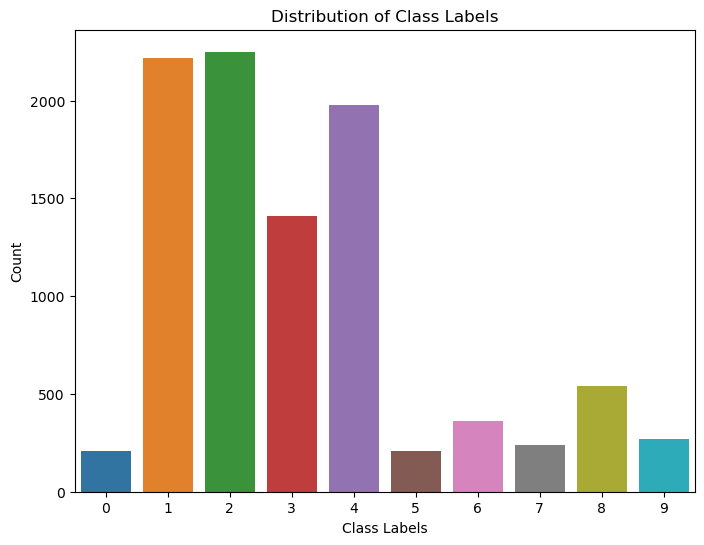

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(x='0', data=y_train)
plt.title("Distribution of Class Labels")
plt.xlabel("Class Labels")
plt.ylabel("Count")
plt.show()

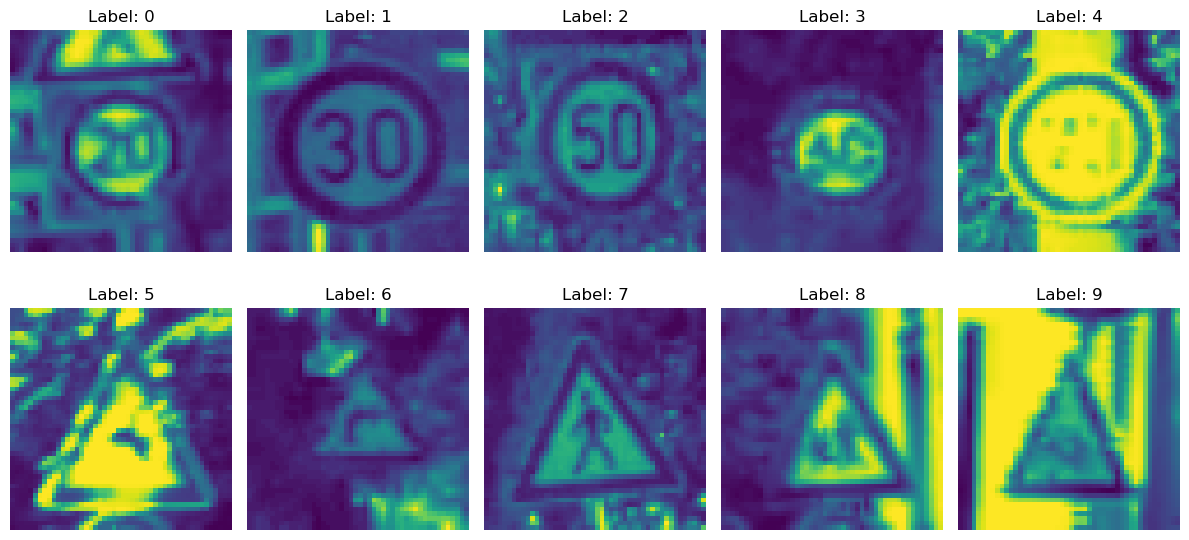

In [22]:
# To display one image for each label

# Initialize a dictionary to store one image for each label
label_images = {}

# Iterate through the rows of the DataFrames and find one image for each label
for index, row in x_train.iterrows():
    label = y_train.iloc[index, 0]  
    
    if label not in label_images:
        # Store the first image for each unique label
        label_images[label] = row.values.reshape(48, 48)  
    
    # Break the loop if we have found one image for each unique label
    if len(label_images) == 10:
        break

# Display the images
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
for i, (label, image) in enumerate(label_images.items()):
    r, c = divmod(i, 5)
    axs[r, c].imshow(image)
    axs[r, c].set_title(f'Label: {label}')
    axs[r, c].axis('off')

plt.tight_layout()
plt.show()

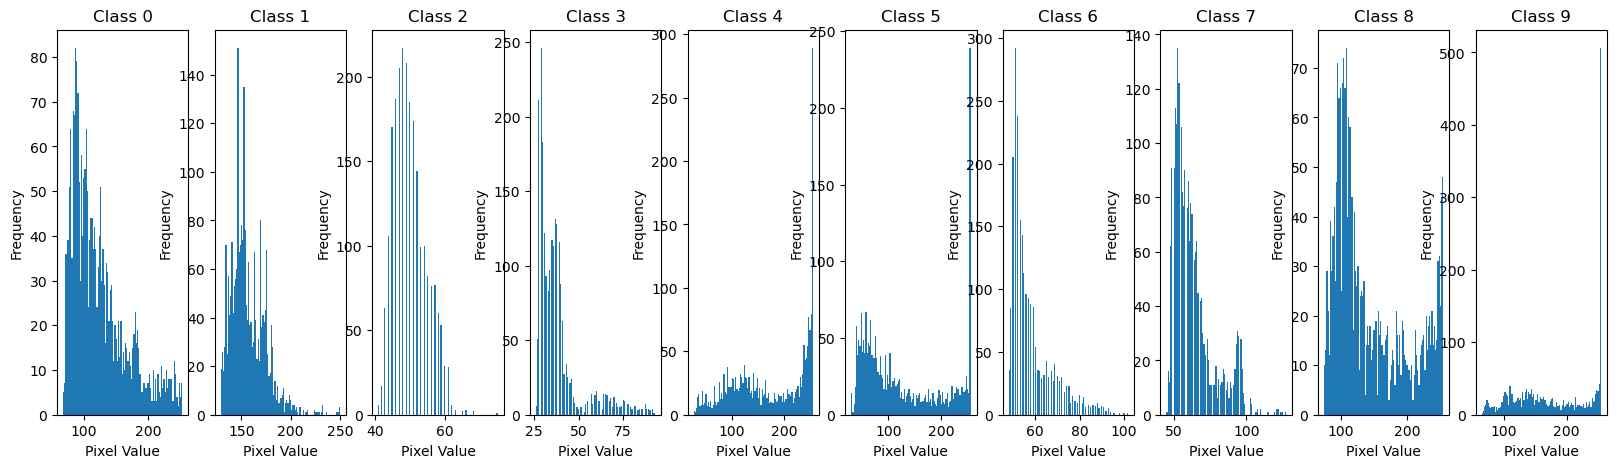

In [23]:
import matplotlib.pyplot as plt

unique_class_labels = y_train['0'].unique()

fig, axes = plt.subplots(1, len(unique_class_labels), figsize=(20, 5))

for i, class_label in enumerate(unique_class_labels):
    # Select an image for each class
    class_images = x_train[y_train['0'] == class_label]
    
    if not class_images.empty:
        img = class_images.iloc[0, :-1].values
        
        # Plot the histogram for the image of each class
        axes[i].hist(img, bins=100)
        axes[i].set_title(f'Class {class_label}')
        axes[i].set_xlabel("Pixel Value")
        axes[i].set_ylabel("Frequency")

plt.show()


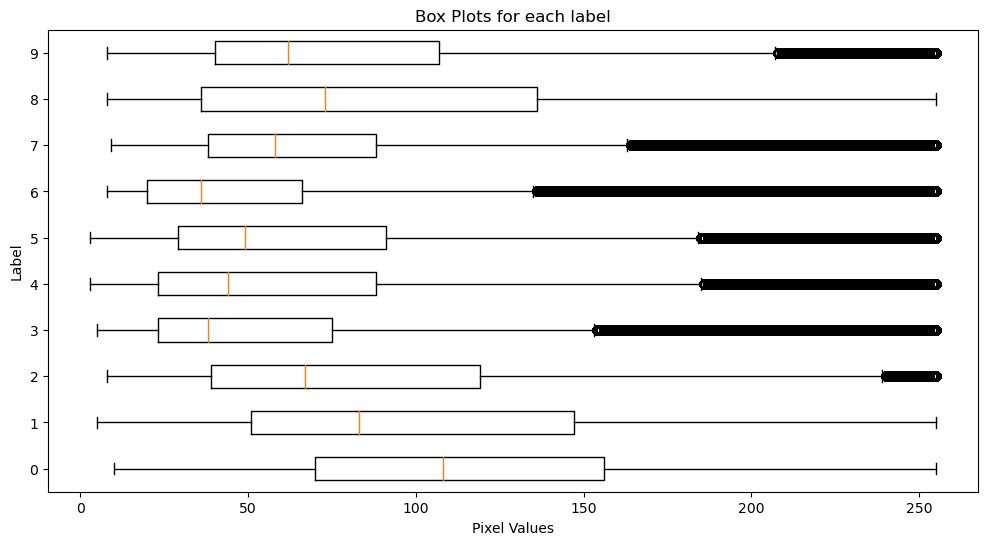

Label 0: 210 images
Label 1: 2220 images
Label 2: 2250 images
Label 3: 1410 images
Label 4: 1980 images
Label 5: 210 images
Label 6: 360 images
Label 7: 240 images
Label 8: 540 images
Label 9: 270 images


In [24]:
x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)

# store image data for each label
label_images = {}

# just to check if all images are being plotted
num_images_per_label = {}

for index, row in x_train.iterrows():
    label = y_train.iloc[index, 0]  
    image_data = row.values.reshape(-1, 48, 48) 

    if label not in label_images:
        label_images[label] = []
    
    # add image data to associated labels
    label_images[label].append(image_data)

    # just to check if all images are being plotted
    num_images_per_label[label] = len(label_images[label])

# get numpy array from dictionary values (image data)
box_data = np.array(list(label_images.values()), dtype=object)

# labels from keys
labels = list(label_images.keys())

# box plots for each label 
plt.figure(figsize=(12, 6))
plt.boxplot(box_data, labels=labels, vert=False)
plt.title("Box Plots for each label")
plt.xlabel("Pixel Values")
plt.ylabel("Label")
plt.show()


# just to check if all images are being plotted
for label, num_images in num_images_per_label.items():
    print(f"Label {label}: {num_images} images")

In [25]:
onevrall_x_train = pd.DataFrame(x_train) 
no_aug_y_train = pd.DataFrame(y_train)
print(x_train.shape, y_train.shape)

(9690, 2304) (9690, 1)


### 2) Preprocessing the Train Dataset

In [26]:
# Created a list to store the labels that have less number of pictures
less_class_labels = [0, 5, 6, 7, 8, 9]

data_list = []
for index, row in x_train.iterrows():
    label = y_train.iloc[index, 0]
    image_data = row.values.reshape(48, 48)

    if label in less_class_labels:
        data_list.append((image_data, label))

subset_dataset = np.array(data_list, dtype=object)

print(subset_dataset.shape)

num_images_per_label = {label: np.sum(subset_dataset[:, 1] == label) for label in less_class_labels}

for label, num_images in num_images_per_label.items():
    print(f"Label {label}: {num_images} images")

(1830, 2)
Label 0: 210 images
Label 5: 210 images
Label 6: 360 images
Label 7: 240 images
Label 8: 540 images
Label 9: 270 images


In [27]:
def add_noise(feature_vector, noise_level=0.01):
    noise = np.random.normal(0, noise_level, feature_vector.shape)
    noisy_vector = feature_vector + noise
    return noisy_vector

In [28]:
def introduce_perturbations(feature_vector, perturbation_level=0.02):
    min_value = np.min(feature_vector)
    max_value = np.max(feature_vector)
    perturbations = np.random.uniform(-perturbation_level, perturbation_level, feature_vector.shape)
    perturbed_vector = feature_vector + perturbations * (max_value - min_value)
    return perturbed_vector

In [29]:
print(x_train.shape)
print(y_train.shape)
print('------------------------')

augmented_data = []
new_augmented_data = []
labels_for_train = []
for data, label in subset_dataset:
    noisy_vector = add_noise(data, noise_level=0.01)  
    perturbed_vector = introduce_perturbations(data, perturbation_level=0.02)  
    
        # Append the original and augmented data with their respective labels
    augmented_data.append((data, label))
    augmented_data.append((noisy_vector, label))
    augmented_data.append((perturbed_vector, label))

# Convert the appended data to a NumPy array
for image_vectors, label_col in augmented_data:
    new_augmented_data.append(image_vectors)
    labels_for_train.append(label_col)

new_augmented_data = np.array(new_augmented_data)
labels_for_train = np.array(labels_for_train)

new_labels = labels_for_train.reshape(-1, 1)

new_augmented_data = new_augmented_data.reshape(new_augmented_data.shape[0], -1)

print(new_augmented_data.shape)
print(new_labels.shape)
print('------------------------')
if new_augmented_data.shape[1] == x_train.shape[1]:
    x_train = np.vstack((x_train, new_augmented_data))
    y_train = np.concatenate((y_train, new_labels))
else:
    print("Number of columns in appended_data doesn't match x_train.")

print(x_train.shape)
print(y_train.shape)

(9690, 2304)
(9690, 1)
------------------------
(5490, 2304)
(5490, 1)
------------------------
(15180, 2304)
(15180, 1)


### 3) Running Naïve Bayes Classifier on Train Dataset

#### 3.1) Categorical Naïve Bayes Classifier

In [30]:
from sklearn.naive_bayes import CategoricalNB

x_train = np.asarray(x_train)
xtrain_images = x_train.reshape(x_train.shape[0], -1)
y_train = np.asarray(y_train).ravel()
clf = CategoricalNB()
clf.fit(xtrain_images, y_train)

predictions = clf.predict(x_train)

#### 3.2) Gaussian Naïve Bayes Classifier

In [31]:
from sklearn.naive_bayes import GaussianNB

x_train = np.asarray(x_train)
xtrain_images = x_train.reshape(x_train.shape[0], -1)
y_train = np.asarray(y_train).ravel()
clf2 = GaussianNB()
clf2.fit(xtrain_images, y_train)

predictions_gb = clf2.predict(x_train)

"""
#Using the stratified train test split to split the data into train and test sets
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
xtrain_images = xtrain_images.reshape(xtrain_images.shape[0], -1)
X_train, X_test, Y_train, Y_test = train_test_split(xtrain_images,y_train,test_size=0.33, random_state=42)
clf2 = GaussianNB()
clf2.fit(X_train, Y_train)
predictions2 = clf2.predict(X_test)
"""

'\n#Using the stratified train test split to split the data into train and test sets\nfrom sklearn.naive_bayes import GaussianNB\nfrom sklearn.model_selection import train_test_split\nxtrain_images = xtrain_images.reshape(xtrain_images.shape[0], -1)\nX_train, X_test, Y_train, Y_test = train_test_split(xtrain_images,y_train,test_size=0.33, random_state=42)\nclf2 = GaussianNB()\nclf2.fit(X_train, Y_train)\npredictions2 = clf2.predict(X_test)\n'

### 4) Evaluation Metrics for the Naïve Bayes Classifier on Dataset

#### 4.1) Categorical Naïve Bayes Classifier

In [32]:
from sklearn.metrics import classification_report

report = classification_report(y_train, predictions)

print(report)

              precision    recall  f1-score   support

           0       0.77      0.98      0.86       840
           1       0.65      0.74      0.69      2220
           2       0.73      0.65      0.69      2250
           3       0.41      0.71      0.52      1410
           4       0.82      0.25      0.38      1980
           5       0.96      0.82      0.88       840
           6       0.65      0.73      0.69      1440
           7       0.85      0.89      0.87       960
           8       0.98      0.66      0.79      2160
           9       0.60      0.97      0.74      1080

    accuracy                           0.69     15180
   macro avg       0.74      0.74      0.71     15180
weighted avg       0.74      0.69      0.68     15180



In [33]:
from sklearn.metrics import accuracy_score

# accuracy
accuracy = accuracy_score(y_train, predictions)
print('Accuracy = ', accuracy)

Accuracy =  0.691304347826087


In [34]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_train, predictions)
confusion_matrix

array([[ 820,    1,    9,    2,    4,    0,    0,    3,    1,    0],
       [  76, 1634,  183,  182,   25,    0,   18,   37,    2,   63],
       [  71,  190, 1469,  315,   19,    0,  113,   14,    0,   59],
       [   4,  129,   64,  998,   44,    0,   83,   10,    3,   75],
       [  63,  463,  257,  400,  493,   32,  147,   14,    0,  111],
       [   5,   14,    0,   70,    0,  685,   29,    2,   12,   23],
       [   0,   39,   20,   93,    0,    0, 1058,   63,    4,  163],
       [   3,    0,    0,   93,    2,    0,    0,  859,    0,    3],
       [  19,   36,   24,  253,   15,    0,  167,   11, 1426,  209],
       [   2,    3,    0,   15,    0,    0,    8,    0,    0, 1052]])

<Axes: >

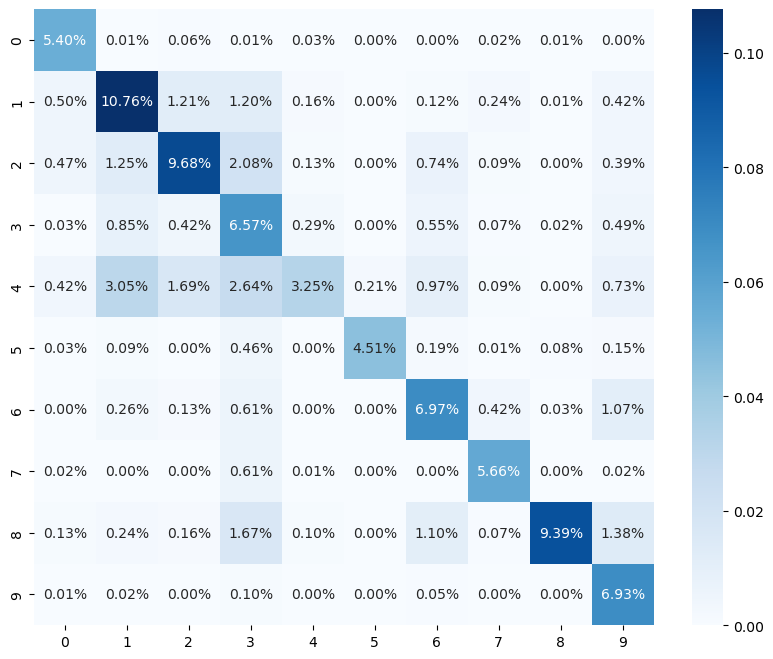

In [35]:
import seaborn as sns
plt.figure(figsize=(10, 8)) 
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True,  fmt='.2%', cmap='Blues')

In [36]:
tp = confusion_matrix.diagonal()
fn = np.sum(confusion_matrix, axis=1) - tp
fp = np.sum(confusion_matrix, axis=0) - tp
tn = np.sum(confusion_matrix) - (tp + fn + fp)

# TP Rate (Sensitivity or Recall)
tp_rate = tp / (tp + fn)

# FP Rate
fp_rate = fp / (fp + tn)

for class_label, tp, fp in zip(range(len(tp_rate)), tp_rate, fp_rate):
    print(f"Class {class_label}: \nTP Rate = {tp}, \nFP Rate = {fp}")

Class 0: 
TP Rate = 0.9761904761904762, 
FP Rate = 0.016945606694560668
Class 1: 
TP Rate = 0.7360360360360361, 
FP Rate = 0.06751543209876543
Class 2: 
TP Rate = 0.6528888888888889, 
FP Rate = 0.04307811291569992
Class 3: 
TP Rate = 0.7078014184397163, 
FP Rate = 0.10334059549745825
Class 4: 
TP Rate = 0.24898989898989898, 
FP Rate = 0.008257575757575757
Class 5: 
TP Rate = 0.8154761904761905, 
FP Rate = 0.0022315202231520223
Class 6: 
TP Rate = 0.7347222222222223, 
FP Rate = 0.04112081513828239
Class 7: 
TP Rate = 0.8947916666666667, 
FP Rate = 0.010829817158931084
Class 8: 
TP Rate = 0.6601851851851852, 
FP Rate = 0.0016897081413210445
Class 9: 
TP Rate = 0.9740740740740741, 
FP Rate = 0.0500709219858156


In [37]:
specificity = []
unique_labels = np.unique(y_train)

for i in range(len(unique_labels)):
    true_negative = np.sum(confusion_matrix) - np.sum(confusion_matrix[i, :]) - np.sum(confusion_matrix[:, i]) + confusion_matrix[i, i]
    total_negative = np.sum(confusion_matrix) - np.sum(confusion_matrix[i, :])
    print(f'Label {unique_labels[i]} specificity: {true_negative / total_negative}')

Label 0 specificity: 0.9830543933054393
Label 1 specificity: 0.9324845679012346
Label 2 specificity: 0.9569218870843
Label 3 specificity: 0.8966594045025418
Label 4 specificity: 0.9917424242424242
Label 5 specificity: 0.997768479776848
Label 6 specificity: 0.9588791848617176
Label 7 specificity: 0.989170182841069
Label 8 specificity: 0.9983102918586789
Label 9 specificity: 0.9499290780141844


In [38]:
from sklearn.metrics import recall_score

sensitivity = recall_score(y_train, predictions, average=None)
for i in range(len(unique_labels)):
    print(f'Label {unique_labels[i]} sensitivity: {sensitivity[i]}')

Label 0 sensitivity: 0.9761904761904762
Label 1 sensitivity: 0.7360360360360361
Label 2 sensitivity: 0.6528888888888889
Label 3 sensitivity: 0.7078014184397163
Label 4 sensitivity: 0.24898989898989898
Label 5 sensitivity: 0.8154761904761905
Label 6 sensitivity: 0.7347222222222223
Label 7 sensitivity: 0.8947916666666667
Label 8 sensitivity: 0.6601851851851852
Label 9 sensitivity: 0.9740740740740741


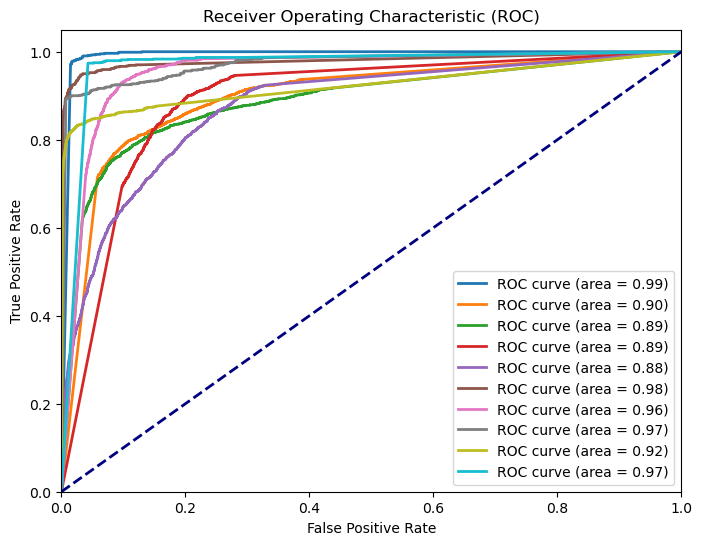

In [39]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

probabilities = clf.predict_proba(x_train)
roc_auc_scores = []
plt.figure(figsize=(8, 6))

for i in range(len(unique_labels)):
    fpr, tpr, _ = roc_curve((y_train == unique_labels[i]).astype(int), probabilities[:, i])
    roc_auc = auc(fpr, tpr)
    roc_auc_scores.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

##### Evaluation Using Cross-Validation

In [109]:
# num_folds = 10
# subset_size = len(x_train) // num_folds
# print(subset_size)
# ysubset_size = len(y_train) // num_folds
# print(ysubset_size)
# accuracies = []

# for i in range(num_folds):
#     xtesting_this_round = x_train[i * subset_size: (i + 1) * subset_size]
#     ytesting_this_round = y_train[i * subset_size: (i + 1) * subset_size]

#     if i == 0:
#         xtraining_this_round = x_train[(i + 1) * subset_size:]
#         ytraining_this_round = y_train[(i + 1) * subset_size:]
#     elif i > 0 and i < 10:
#         xtraining_this_round = np.concatenate((x_train[0:i * subset_size], x_train[(i + 1) * subset_size:]))
#         ytraining_this_round = np.concatenate((y_train[0:i * subset_size], y_train[(i + 1) * subset_size:]))
#     elif i == 10:
#         xtraining_this_round = x_train[:i * subset_size]
#         ytraining_this_round = y_train[:i * subset_size]

#     # training_indices = np.r_[0:i * subset_size, (i + 1) * subset_size:]
#     # print("Training indices: ", training_indices)
#     # print(len(training_indices))
#     # training_this_round = x_train[0:i * subset_size]
#     # print("Training round: ", training_this_round)
#     # y_training_this_round = y_train[training_indices]
#     # ytesting_this_round = y_train[i * ysubset_size: (i + 1) * ysubset_size]

#     print(len(xtraining_this_round))
#     print(len(ytraining_this_round))
#     print('---------------------')
#     print(len(xtesting_this_round))
#     print(len(ytesting_this_round))
#     print('______________________')

#     clf.fit(xtraining_this_round, ytraining_this_round)  # Train using training_this_round
#     predictionst = clf.predict(xtesting_this_round)  # Predict using testing_this_round

#     # Evaluate against testing_this_round and save accuracy
#     accuracy = accuracy_score(ytesting_this_round, predictionst)
#     accuracies.append(accuracy)

# # Calculate the mean accuracy over all rounds
# mean_accuracy = sum(accuracies) / num_folds

# print("Accuracy for each fold:", accuracies)
# print("Mean Accuracy:", mean_accuracy)

#### 4.2) Gaussian Naïve Bayes Classifier

In [41]:
from sklearn.metrics import classification_report

report_gb = classification_report(y_train, predictions_gb)

print(report_gb)

              precision    recall  f1-score   support

           0       0.40      0.73      0.52       840
           1       0.35      0.21      0.27      2220
           2       0.36      0.17      0.23      2250
           3       0.39      0.22      0.28      1410
           4       0.38      0.15      0.21      1980
           5       0.29      0.21      0.24       840
           6       0.22      0.67      0.33      1440
           7       0.16      0.54      0.25       960
           8       0.79      0.25      0.38      2160
           9       0.37      0.28      0.32      1080

    accuracy                           0.30     15180
   macro avg       0.37      0.34      0.30     15180
weighted avg       0.40      0.30      0.29     15180



In [42]:
from sklearn.metrics import accuracy_score

# accuracy
accuracy_gb = accuracy_score(y_train, predictions_gb)
print('Accuracy = ', accuracy_gb)

Accuracy =  0.3005270092226614


In [43]:
from sklearn.metrics import confusion_matrix

confusion_matrix_gb = confusion_matrix(y_train, predictions_gb)
confusion_matrix_gb

array([[616,  20,  70,  46,  16,   0,   0,  72,   0,   0],
       [562, 471, 252,  78, 131,  54, 342, 290,  17,  23],
       [139, 372, 378, 178, 255, 101, 378, 389,   0,  60],
       [ 59,  57,  16, 310,  46,  44, 757,  67,  27,  27],
       [ 64, 205, 177, 113, 293,  75, 883, 151,   0,  19],
       [ 40,   8,   8,   0,   0, 176, 240, 316,  44,   8],
       [  0,  40,   0,   8,   0,  17, 964, 203,  16, 192],
       [ 12,   4,  20,  64,   0,   0, 260, 520,   8,  72],
       [ 55, 124, 137,   0,   0, 116, 492, 596, 537, 103],
       [  0,  32,   0,   8,  24,  16,  79, 592,  32, 297]])

<Axes: >

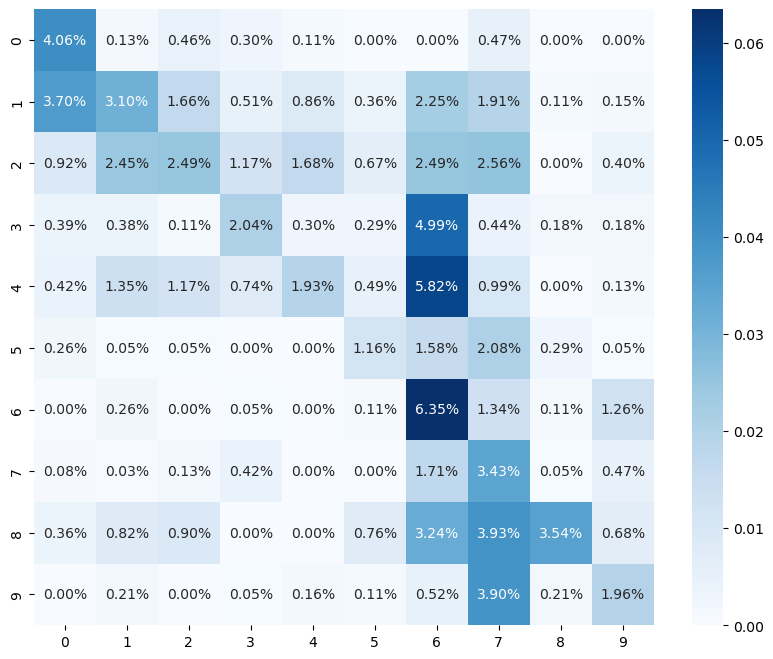

In [44]:
import seaborn as sns
plt.figure(figsize=(10, 8)) 
sns.heatmap(confusion_matrix_gb/np.sum(confusion_matrix_gb), annot=True,  fmt='.2%', cmap='Blues')

In [45]:
tp_gb = confusion_matrix_gb.diagonal()
fn_gb = np.sum(confusion_matrix_gb, axis=1) - tp
fp_gb = np.sum(confusion_matrix_gb, axis=0) - tp
tn_gb = np.sum(confusion_matrix_gb) - (tp + fn + fp)

# TP Rate (Sensitivity or Recall)
tp_rate_gb = tp_gb / (tp_gb + fn_gb)

# FP Rate
fp_rate_gb = fp_gb / (fp_gb + tn_gb)

for class_label, tp, fp in zip(range(len(tp_rate_gb)), tp_rate_gb, fp_rate_gb):
    print(f"Class {class_label}: \nTP Rate = {tp}, \nFP Rate = {fp}")

Class 0: 
TP Rate = 0.4233601539491469, 
FP Rate = 0.09254868369369716
Class 1: 
TP Rate = 0.1750912492926545, 
FP Rate = 0.0836436908610599
Class 2: 
TP Rate = 0.1438889491989956, 
FP Rate = 0.06839377574386335
Class 3: 
TP Rate = 0.18033468566393113, 
FP Rate = 0.05163610776222718
Class 4: 
TP Rate = 0.1289597960377995, 
FP Rate = 0.0528518145960536
Class 5: 
TP Rate = 0.17339458579784497, 
FP Rate = 0.03828100484894002
Class 6: 
TP Rate = 0.40116088203607486, 
FP Rate = 0.22896282206029897
Class 7: 
TP Rate = 0.3515827484054821, 
FP Rate = 0.1748495383643168
Class 8: 
TP Rate = 0.19918206083851814, 
FP Rate = 0.044960386502785506
Class 9: 
TP Rate = 0.21583895652267532, 
FP Rate = 0.05015521513403582


In [46]:
specificity_gb = []
unique_labels_gb = np.unique(y_train)

for i in range(len(unique_labels_gb)):
    true_negative_gb = np.sum(confusion_matrix_gb) - np.sum(confusion_matrix_gb[i, :]) - np.sum(confusion_matrix_gb[:, i]) + confusion_matrix_gb[i, i]
    total_negative_gb = np.sum(confusion_matrix_gb) - np.sum(confusion_matrix_gb[i, :])
    print(f'Label {unique_labels_gb[i]} specificity: {true_negative_gb / total_negative_gb}')

Label 0 specificity: 0.9350767085076709
Label 1 specificity: 0.9334876543209877
Label 2 specificity: 0.9474091260634184
Label 3 specificity: 0.9640522875816994
Label 4 specificity: 0.9642424242424242
Label 5 specificity: 0.9705020920502092
Label 6 specificity: 0.7502911208151383
Label 7 specificity: 0.8118143459915612
Label 8 specificity: 0.9889400921658986
Label 9 specificity: 0.9642553191489361


In [47]:
from sklearn.metrics import recall_score

sensitivity_gb = recall_score(y_train, predictions_gb, average=None)
for i in range(len(unique_labels_gb)):
    print(f'Label {unique_labels_gb[i]} sensitivity: {sensitivity_gb[i]}')

Label 0 sensitivity: 0.7333333333333333
Label 1 sensitivity: 0.21216216216216216
Label 2 sensitivity: 0.168
Label 3 sensitivity: 0.2198581560283688
Label 4 sensitivity: 0.147979797979798
Label 5 sensitivity: 0.20952380952380953
Label 6 sensitivity: 0.6694444444444444
Label 7 sensitivity: 0.5416666666666666
Label 8 sensitivity: 0.24861111111111112
Label 9 sensitivity: 0.275


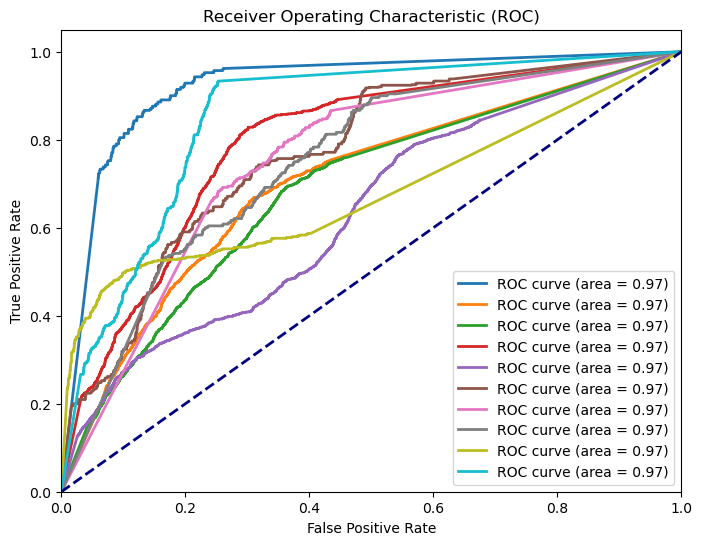

In [48]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

probabilities_gb = clf2.predict_proba(x_train)
roc_auc_scores_gb = []
plt.figure(figsize=(8, 6))

for i in range(len(unique_labels_gb)):
    fpr_gb, tpr_gb, _ = roc_curve((y_train == unique_labels_gb[i]).astype(int), probabilities_gb[:, i])
    roc_auc_gb = auc(fpr_gb, tpr_gb)
    roc_auc_scores_gb.append(roc_auc_gb)
    plt.plot(fpr_gb, tpr_gb, lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

##### Evaluation Using Cross-Validation

In [49]:
# from sklearn.metrics import accuracy_score
# num_folds = 10
# subset_size = len(x_train) // num_folds
# print(subset_size)
# ysubset_size = len(y_train) // num_folds
# print(ysubset_size)
# accuracies = []

# for i in range(num_folds):
#     xtesting_this_round = x_train[i * subset_size: (i + 1) * subset_size]
#     ytesting_this_round = y_train[i * subset_size: (i + 1) * subset_size]

#     if i == 0:
#         xtraining_this_round = x_train[(i + 1) * subset_size:]
#         ytraining_this_round = y_train[(i + 1) * subset_size:]
#     elif i > 0 and i < 10:
#         xtraining_this_round = np.concatenate((x_train[0:i * subset_size], x_train[(i + 1) * subset_size:]))
#         ytraining_this_round = np.concatenate((y_train[0:i * subset_size], y_train[(i + 1) * subset_size:]))
#     elif i == 10:
#         xtraining_this_round = x_train[:i * subset_size]
#         ytraining_this_round = y_train[:i * subset_size]

#     # training_indices = np.r_[0:i * subset_size, (i + 1) * subset_size:]
#     # print("Training indices: ", training_indices)
#     # print(len(training_indices))
#     # training_this_round = x_train[0:i * subset_size]
#     # print("Training round: ", training_this_round)
#     # y_training_this_round = y_train[training_indices]
#     # ytesting_this_round = y_train[i * ysubset_size: (i + 1) * ysubset_size]

#     print(len(xtraining_this_round))
#     print(len(ytraining_this_round))
#     print('---------------------')
#     print(len(xtesting_this_round))
#     print(len(ytesting_this_round))
#     print('______________________')

#     clf2.fit(xtraining_this_round, ytraining_this_round)  # Train using training_this_round
#     predictionst2 = clf2.predict(xtesting_this_round)  # Predict using testing_this_round

#     # Evaluate against testing_this_round and save accuracy
#     accuracy = accuracy_score(ytesting_this_round, predictionst2)
#     accuracies.append(accuracy)

# # Calculate the mean accuracy over all rounds
# mean_accuracy = sum(accuracies) / num_folds

# print("Accuracy for each fold:", accuracies)
# print("Mean Accuracy:", mean_accuracy)

In [50]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [51]:
scores = cross_val_score(clf2, x_train, y_train, scoring="accuracy", cv=10)
display_scores(scores)

Scores: [0.33992095 0.2483531  0.35573123 0.30895916 0.21146245 0.24571805
 0.22924901 0.19367589 0.20948617 0.243083  ]
Mean: 0.2585638998682477
Standard deviation: 0.053671279092969454


In [52]:
scores = cross_val_score(clf2, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
clf2_rmse_scores = np.sqrt(-scores)
display_scores(clf2_rmse_scores)

Scores: [2.49531841 2.74593963 2.83156963 2.21192718 2.48765066 2.6865203
 2.63752189 2.59890014 3.19295998 3.13591966]
Mean: 2.702422747768459
Standard deviation: 0.28140825721997126


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

seed_value = 24

x_train_split, x_test_split, y_train_split, y_test_split = train_test_split(x_train, y_train, test_size=0.3, random_state=seed_value)

gnb = GaussianNB()
gnb.fit(x_train_split, y_train_split)

predicted = gnb.predict(x_test_split)

In [54]:
accuracy = accuracy_score(predicted, y_test_split)
accuracy

0.2951251646903821

### 5) Top Correlating Features - Feature Selection

In [63]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

# Defined the number of features to select for each class
no_of_features_per_class = [5, 10, 20]

# Dictionary stores the top features for each class and each dataset
top_features_per_cd = {}

x_train_class_vs_rest = onevrall_x_train

for class_label in range(10):
    onevrsall_path = os.path.join("OnevrsAll", f"{class_label}_vrs_all")
    y_train_path = os.path.join(onevrsall_path, f"y_train_{class_label}.csv")
    y_train_class_vs_rest = pd.read_csv(y_train_path)
    
    # Dictionary to store the top features for the current class
    top_features_per_class = {}
    
    # Trained a SVC for the one-vs-rest classifier
    classifier = OneVsRestClassifier(SVC(kernel='linear'))
    classifier.fit(x_train_class_vs_rest, y_train_class_vs_rest)
    
    # Get the coefficients (weights) for the features
    feature_weights = classifier.estimators_[0].coef_[0]
    # Sort the features by their absolute weights and select the top features
    for no_f in no_of_features_per_class:
        top_feature_indices = np.argsort(np.abs(feature_weights))[::-1][:no_f]
        top_features = x_train_class_vs_rest.columns[top_feature_indices]
        top_features_per_class[no_f] = top_features.tolist()

    top_features_per_cd[class_label] = top_features_per_class

final_3_datasets = {}
for no_f in no_of_features_per_class:
    dataset_name = f"Data set {no_f}"
    
    selected_features = []
    for class_label, top_features in top_features_per_cd.items():
        selected_features.extend(top_features[no_f])
    
    final_3_datasets[dataset_name] = x_train_class_vs_rest[selected_features]
print("3 Datasets Combined: \n", final_3_datasets)

final_datasets = {}
for i in range(10):
    for no_f in no_of_features_per_class:
        dataset_name = f"Data set {no_f}({i})"
        
        final_datasets[dataset_name] = pd.DataFrame(x_train_class_vs_rest[top_features_per_cd[i][no_f]])
print("30 Datasets for each class and for each top features [5,10,20]: \n", final_datasets)

3 Datasets Combined: 
 {'Data set 5':        1080   1314   1272   1086   1315   1085   1038   801   1792   1167  \
0     142.0  195.0  176.0  123.0  166.0  162.0  121.0  98.0  127.0  211.0   
1     130.0  226.0  212.0  185.0  192.0  198.0  175.0  91.0  112.0  122.0   
2     157.0  194.0  204.0  161.0  148.0  215.0  154.0  87.0  124.0  189.0   
3     151.0  161.0  192.0  177.0  121.0  209.0  162.0  76.0  106.0  202.0   
4     168.0  224.0  170.0  139.0  192.0  154.0  105.0  87.0   96.0  186.0   
...     ...    ...    ...    ...    ...    ...    ...   ...    ...    ...   
9685  111.0  113.0  101.0   18.0   92.0   28.0   18.0  57.0   91.0   20.0   
9686  109.0  112.0  103.0   18.0   78.0   34.0   17.0  91.0   71.0   18.0   
9687  104.0  106.0  102.0   19.0   62.0   34.0   17.0  60.0   92.0   17.0   
9688   97.0   99.0   95.0   19.0   72.0   36.0   15.0  14.0   92.0   16.0   
9689   92.0   94.0   91.0   15.0   58.0   25.0   14.0  35.0   88.0   14.0   

      ...   1221   1314   1173   1362

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

seed_value = 24

accuracies = []

for i in final_datasets:
    no_aug_y_train = np.asarray(no_aug_y_train).ravel()
    x_train_split, x_test_split, y_train_split, y_test_split = train_test_split(final_datasets[i], no_aug_y_train, test_size=0.3, random_state=seed_value)

    gnb = GaussianNB()
    gnb.fit(x_train_split, y_train_split)

    predictions_gb = gnb.predict(x_test_split)
    
    accuracy_gb = accuracy_score(y_test_split, predictions_gb)
    accuracies.append(accuracy_gb)
    print(f'Accuracy for {i} = ', accuracy_gb)
accuracies = np.array(accuracies)
print("Mean Accuracy = ", accuracies.mean())

Accuracy for Data set 5(0) =  0.3113175094599243
Accuracy for Data set 10(0) =  0.2669418644650843
Accuracy for Data set 20(0) =  0.2679738562091503
Accuracy for Data set 5(1) =  0.33436532507739936
Accuracy for Data set 10(1) =  0.30030959752321984
Accuracy for Data set 20(1) =  0.2862057103543172
Accuracy for Data set 5(2) =  0.3171654626762986
Accuracy for Data set 10(2) =  0.35810113519091846
Accuracy for Data set 20(2) =  0.3539731682146543
Accuracy for Data set 5(3) =  0.29927760577915374
Accuracy for Data set 10(3) =  0.3281733746130031
Accuracy for Data set 20(3) =  0.30030959752321984
Accuracy for Data set 5(4) =  0.26590987272101824
Accuracy for Data set 10(4) =  0.30409356725146197
Accuracy for Data set 20(4) =  0.3023735810113519
Accuracy for Data set 5(5) =  0.26625386996904027
Accuracy for Data set 10(5) =  0.2899896800825593
Accuracy for Data set 20(5) =  0.2917096663226694
Accuracy for Data set 5(6) =  0.2731338149294806
Accuracy for Data set 10(6) =  0.2982456140350877

In [65]:
dataset1 = final_3_datasets['Data set 5']
dataset2 = final_3_datasets['Data set 10']
dataset3 = final_3_datasets['Data set 20']

In [66]:
dataset1

,1080,1314,1272,1086,1315,1085,1038,801,1792,1167,...,1221,1314,1173,1362,1222,1475,1179,1519,1226,1471
0,142.0,195.0,176.0,123.0,166.0,162.0,121.0,98.0,127.0,211.0,...,160.0,195.0,157.0,160.0,146.0,78.0,199.0,179.0,155.0,185.0
1,130.0,226.0,212.0,185.0,192.0,198.0,175.0,91.0,112.0,122.0,...,167.0,226.0,193.0,218.0,151.0,99.0,133.0,197.0,162.0,173.0
2,157.0,194.0,204.0,161.0,148.0,215.0,154.0,87.0,124.0,189.0,...,136.0,194.0,159.0,166.0,143.0,86.0,155.0,200.0,117.0,181.0
3,151.0,161.0,192.0,177.0,121.0,209.0,162.0,76.0,106.0,202.0,...,130.0,161.0,138.0,152.0,167.0,80.0,139.0,175.0,126.0,213.0
4,168.0,224.0,170.0,139.0,192.0,154.0,105.0,87.0,96.0,186.0,...,195.0,224.0,209.0,212.0,141.0,148.0,132.0,157.0,131.0,139.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9685,111.0,113.0,101.0,18.0,92.0,28.0,18.0,57.0,91.0,20.0,...,77.0,113.0,110.0,113.0,84.0,18.0,109.0,54.0,108.0,79.0
9686,109.0,112.0,103.0,18.0,78.0,34.0,17.0,91.0,71.0,18.0,...,48.0,112.0,106.0,111.0,83.0,17.0,104.0,60.0,91.0,70.0
9687,104.0,106.0,102.0,19.0,62.0,34.0,17.0,60.0,92.0,17.0,...,35.0,106.0,100.0,103.0,87.0,16.0,103.0,63.0,76.0,59.0
9688,97.0,99.0,95.0,19.0,72.0,36.0,15.0,14.0,92.0,16.0,...,30.0,99.0,91.0,98.0,84.0,16.0,95.0,70.0,62.0,42.0


### 6) Run Naïve Bayes Classifier on data sets created & Evaluation Metrics

Run the Naïve Bayes Classifier on the 30 datasets created for each class and for each top correlating features 
[5,10,20].

In [57]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score
import numpy as np

class_labels = list(range(10))

def evaluate_guassian_nb(X_train, y_train):
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)
    y_pred = nb_model.predict(X_train)
    accuracy = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred, average='macro', zero_division=1)
    recall = recall_score(y_train, y_pred, average='macro', zero_division=1)
    f1 = f1_score(y_train, y_pred, average='macro', zero_division=1)
    roc_auc = roc_auc_score(y_train, nb_model.predict_proba(X_train), multi_class='ovr')
    cross_val_scores = cross_val_score(nb_model, X_train, y_train, scoring="accuracy", cv=10)
    return accuracy, precision, recall, f1, roc_auc, cross_val_scores

y_train_dict = {}
evaluation_metrics = []
dataset_number_features = [5, 10, 20]

for i in final_datasets:
    X_train_fr = final_datasets[i]
    
    accuracy, precision, recall, f1, roc_auc, cross_val_scores = evaluate_guassian_nb(X_train_fr, no_aug_y_train)

    evaluation_metrics.append({
        "Dataset": i,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
        "Cross Val Scores": np.mean(cross_val_scores),
        "TP rate": recall, 
        "FP rate": 1 - recall
    })

df_evaluation_metrics = pd.DataFrame(evaluation_metrics)

In [68]:
df_evaluation_metrics

,Dataset,Accuracy,Precision,Recall,F1 Score,ROC AUC,Cross Val Scores,TP rate,FP rate
0,Data set 5(0),0.333540,0.479578,0.283111,0.232298,0.753777,0.280908,0.283111,0.716889
1,Data set 10(0),0.280702,0.354109,0.298883,0.238846,0.758036,0.255315,0.298883,0.701117
2,Data set 20(0),0.279257,0.377625,0.351333,0.279185,0.765107,0.245304,0.351333,0.648667
3,Data set 5(1),0.321053,0.457388,0.248096,0.228310,0.754934,0.303302,0.248096,0.751904
4,Data set 10(1),0.288854,0.306583,0.264595,0.228723,0.740961,0.263158,0.264595,0.735405
5,Data set 20(1),0.278225,0.291605,0.326883,0.252759,0.759630,0.244066,0.326883,0.673117
6,Data set 5(2),0.309701,0.485199,0.242667,0.200660,0.762770,0.279567,0.242667,0.757333
7,Data set 10(2),0.360372,0.374208,0.332807,0.291813,0.772406,0.308978,0.332807,0.667193
8,Data set 20(2),0.363158,0.397175,0.411786,0.341627,0.781143,0.294840,0.411786,0.588214
9,Data set 5(3),0.296904,0.640462,0.201913,0.140102,0.730148,0.284107,0.201913,0.798087


Run the Naïve Bayes Classifier on the final 3 combined datasets created of each class [5,10,20].

In [69]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score
import numpy as np

class_labels = list(range(10))

def evaluate_categorical_nb(X_train, y_train):
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)
    y_pred = nb_model.predict(X_train)
    accuracy = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)
    roc_auc = roc_auc_score(y_train, y_pred)
    cross_val_scores = cross_val_score(nb_model, X_train, y_train, scoring="accuracy", cv=10)
    return accuracy, precision, recall, f1, roc_auc, cross_val_scores

datasets = [dataset1, dataset2, dataset3]  
y_train_dict = {}
evaluation_metrics = []
dataset_number_features = [5, 10, 20]

for dataset_number, dataset in enumerate(datasets):
    X_train_fr = dataset
    
    for class_label in class_labels:
        onevrsall_path = os.path.join("OnevrsAll", f"{class_label}_vrs_all")
        y_train_file = os.path.join(onevrsall_path, f"y_train_{class_label}.csv")
        y_train_df = pd.read_csv(y_train_file).values.ravel()
    
        accuracy, precision, recall, f1, roc_auc, cross_val_scores = evaluate_categorical_nb(X_train_fr, y_train_df)

        evaluation_metrics.append({
            "Dataset": str(dataset_number_features[dataset_number]),
            "Class Label": class_label,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "ROC AUC": roc_auc,
            "Cross Val Scores": np.mean(cross_val_scores),
            "TP rate": recall, 
            "FP rate": 1 - recall
        })

df3_evaluation_metrics = pd.DataFrame(evaluation_metrics)

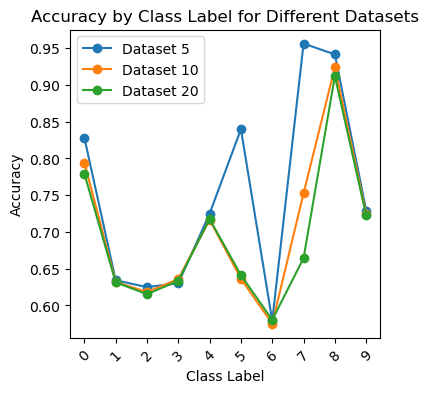

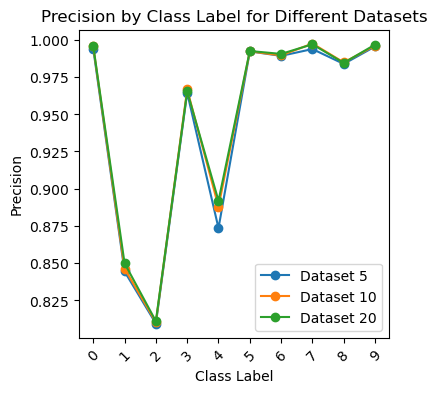

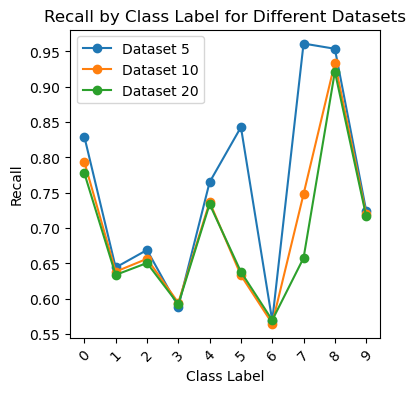

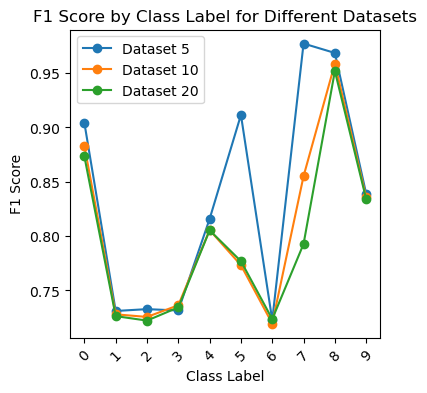

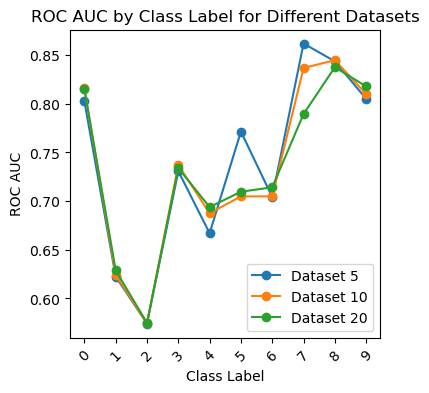

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

for metric in metrics:
    plt.figure(figsize=(4, 4)) 
    for dataset_number in [5, 10, 20]:
        dataset_metrics = df3_evaluation_metrics[df3_evaluation_metrics['Dataset'] == str(dataset_number)]
        x_values = dataset_metrics['Class Label']
        y_values = dataset_metrics[metric]
        plt.plot(x_values, y_values, marker='o', label=f'Dataset {dataset_number}')

    plt.title(f'{metric} by Class Label for Different Datasets')
    plt.xlabel('Class Label')
    plt.ylabel(metric)
    plt.legend()
    plt.xticks(x_values)  
    plt.xticks(rotation=45)
    plt.show()

In [71]:
df3_evaluation_metrics

,Dataset,Class Label,Accuracy,Precision,Recall,F1 Score,ROC AUC,Cross Val Scores,TP rate,FP rate
0,5,0,0.827967,0.994056,0.829114,0.904124,0.802652,0.824045,0.829114,0.170886
1,5,1,0.634262,0.844386,0.644311,0.730904,0.622381,0.620846,0.644311,0.355689
2,5,2,0.624974,0.809431,0.669086,0.732597,0.574099,0.611146,0.669086,0.330914
3,5,3,0.630237,0.964406,0.589010,0.731349,0.730675,0.628689,0.589010,0.410990
4,5,4,0.724871,0.873519,0.764981,0.815655,0.666834,0.626935,0.764981,0.235019
5,5,5,0.839628,0.992176,0.842722,0.911362,0.771361,0.766770,0.842722,0.157278
6,5,6,0.579051,0.989193,0.569025,0.722460,0.703957,0.583282,0.569025,0.430975
7,5,7,0.956037,0.993762,0.960952,0.977082,0.861726,0.933333,0.960952,0.039048
8,5,8,0.941280,0.983764,0.953552,0.968422,0.843443,0.905676,0.953552,0.046448
9,5,9,0.728999,0.995478,0.724522,0.838658,0.804854,0.736017,0.724522,0.275478


### Explored the Coffee Leaf dataset that we used in Lab 4 and Lab 5

#### JMuBEN dataset

### 1) Loading the dataset

In [72]:
import os
import requests
import zipfile
import numpy as np

dataset_url = 'https://github.com/ishaqmarashy/DATALFS/raw/main/JMuBEN.zip'
dataset_dir = './JMuBEN'

# create directory for dataset if it does not exist
if not os.path.exists(dataset_dir):
    os.makedirs(dataset_dir)
    
# append JMuBEN.zip to the end of the path (this is where we download the file to)
zip_file_path = os.path.join(dataset_dir, 'JMuBEN.zip')


# check if file is downloaded already
if not os.path.exists(zip_file_path):
    
    # file is not downloaded so fetch the file
    response = requests.get(dataset_url)
    
    # write file to storage which is recieved from the response
    with open(zip_file_path, 'wb') as zip_file:
        zip_file.write(response.content)
        
    # unzip to zip file path
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(dataset_dir)

# within the concat train and test to become ./JMuBEN/train and JMuBEN ./JMuBEN/test
train_dir = os.path.join(dataset_dir, 'train')
test_dir = os.path.join(dataset_dir, 'test')

In [73]:
def load_images_and_labels(directory):
    images = []
    labels = []
    
    # get subdirectories Healthy and Miner
    
    for class_name in os.listdir(directory):
        
        # concat subdirectory to get full path
        class_dir = os.path.join(directory, class_name)
        # assign labels using class subdirectory
        # label is determined by filepath
        label = 0 if class_name == 'Miner' else 1
        
        # append labels and image paths to labels and images respectively
        for filename in os.listdir(class_dir):
            images.append(os.path.join(class_dir, filename))
            labels.append(label)
            
    return images, labels

# load file directories and their labels
train_images_dir, train_labels = load_images_and_labels(train_dir)
test_images_dir, test_labels = load_images_and_labels(test_dir)

In [74]:
# print the number of images and labels

print(f"Train images:{len(train_images_dir)}  Labels:{len(train_labels)}")
print(f"Test images:{len(test_images_dir)}  Labels:{len(test_labels)}")

Train images:24000  Labels:24000
Test images:6000  Labels:6000


#### 2) Pre-processing

In [75]:
import cv2
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

def load_grayscale_images(image_paths):
    loaded_images = []
    for image_path in image_paths:
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  #  grayscale
        loaded_images.append(img)
    return loaded_images

def resize_images(images_to_resize):
    resized_images = []
    for img in images_to_resize:
        resized_img = cv2.resize(img, (128, 128))  # resize
        resized_images.append(resized_img)
    return resized_images

def normalize_image(images_to_normalize):
    normalized_images = []
    for img in images_to_normalize:
        normalized_img = img / 255.0  # normalize
        normalized_images.append(normalized_img)
    return normalized_images

image_pipeline = Pipeline(steps=[
    ('load_grayscale_images', FunctionTransformer(load_grayscale_images)),
    ('resize_images', FunctionTransformer(resize_images)),
    ('normalize_image', FunctionTransformer(normalize_image))
])


train_images=image_pipeline.transform(train_images_dir)
test_images=image_pipeline.transform(test_images_dir)

In [76]:
print(len(train_images))
print(len(test_images))

24000
6000


#### 3) Data Visualisation

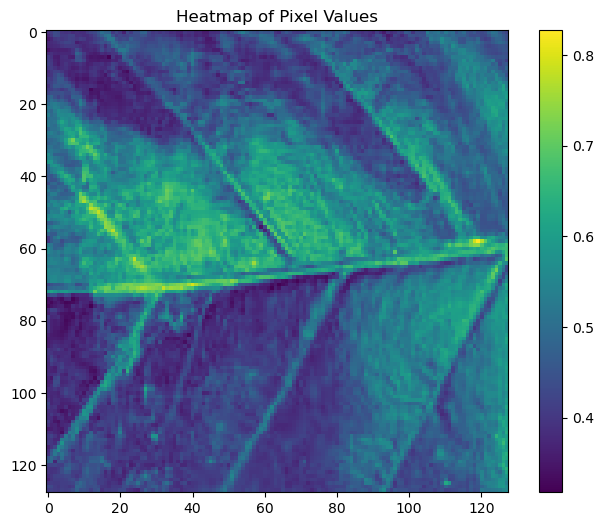

In [77]:
import matplotlib.pyplot as plt

sample_image = train_images[3]

plt.figure(figsize=(8, 6))
plt.imshow(sample_image, cmap='viridis')  
plt.colorbar()
plt.title('Heatmap of Pixel Values')
plt.show()

In [78]:
import cv2
import numpy as np

image = train_images[3]
pixel_values = image.reshape(-1)  # Flatten the image into a 1D array
mean_pixel_value = np.mean(pixel_values)
std_pixel_value = np.std(pixel_values)
min_pixel_value = np.min(pixel_values)
max_pixel_value = np.max(pixel_values)

 
print(f"Mean Pixel Value: {mean_pixel_value}")
print(f"Standard Deviation of Pixel Values: {std_pixel_value}")
print(f"Minimum Pixel Value: {min_pixel_value}")
print(f"Maximum Pixel Value: {max_pixel_value}")

Mean Pixel Value: 0.490066348805147
Standard Deviation of Pixel Values: 0.08589211139986472
Minimum Pixel Value: 0.3176470588235294
Maximum Pixel Value: 0.8274509803921568


In [79]:
from collections import Counter

# Calculate class counts
class_counts_train= Counter(train_labels)
print(class_counts_train)

class_counts_test = Counter(test_labels)
print(class_counts_test)

Counter({1: 12000, 0: 12000})
Counter({1: 3000, 0: 3000})


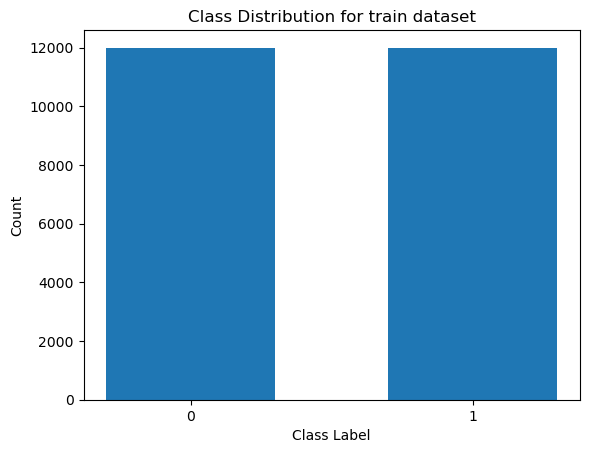

In [80]:
import matplotlib.pyplot as plt

# Example: Histogram of class distribution
plt.hist(train_labels, bins=[0, 1,2], align='left', rwidth=0.6)
plt.xticks([0, 1], ['0', '1'])
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Class Distribution for train dataset')
plt.show()

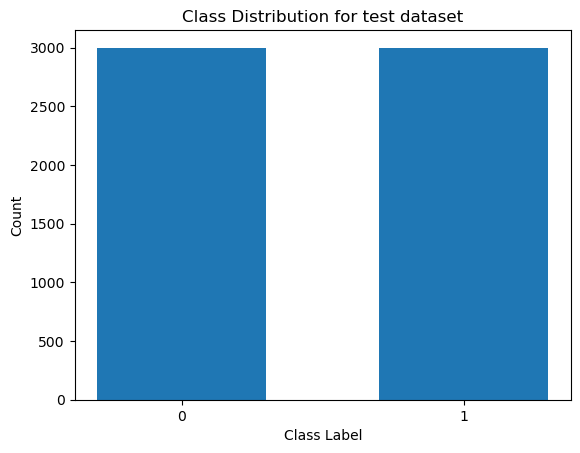

In [81]:
import matplotlib.pyplot as plt

# Example: Histogram of class distribution
plt.hist(test_labels, bins=[0, 1,2], align='left', rwidth=0.6)
plt.xticks([0, 1], ['0', '1'])
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Class Distribution for test dataset')
plt.show()

In [82]:
import os
import cv2
import numpy as np

# Get the current working directory as the root path
root_path = os.path.join(os.getcwd(), "JMuBEN")

# Initialize empty lists to store the information
sizes = []
resolutions = []
color_distributions = []

# Iterate over each image file in each subdirectory
for dirpath, dirnames, filenames in os.walk(root_path):
    for filename in filenames:
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Load the image file using OpenCV
            img_path = os.path.join(dirpath, filename)
            img = cv2.imread(img_path)

            # Extract the size of the image
            size = os.path.getsize(img_path)
            sizes.append(size)

            # Extract the resolution of the image
            resolution = img.shape[:2]
            resolutions.append(resolution)

            # Extract the color distribution of the image
            color_distribution = np.bincount(img.flatten(), minlength=256)
            color_distributions.append(color_distribution)

# Convert the lists to numpy arrays for easier manipulation
sizes = np.array(sizes)
resolutions = np.array(resolutions)
color_distributions = np.array(color_distributions)

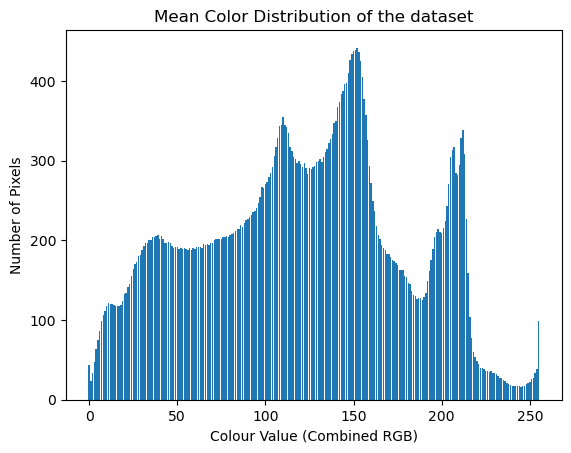

In [83]:
import matplotlib.pyplot as plt

# Calculate the mean color distribution across all images
mean_color_distribution = np.mean(color_distributions, axis=0)

# Plot a bar chart of the mean color distribution
plt.bar(np.arange(256), mean_color_distribution)
plt.title("Mean Color Distribution of the dataset")
plt.xlabel("Colour Value (Combined RGB)")
plt.ylabel("Number of Pixels")
plt.show()

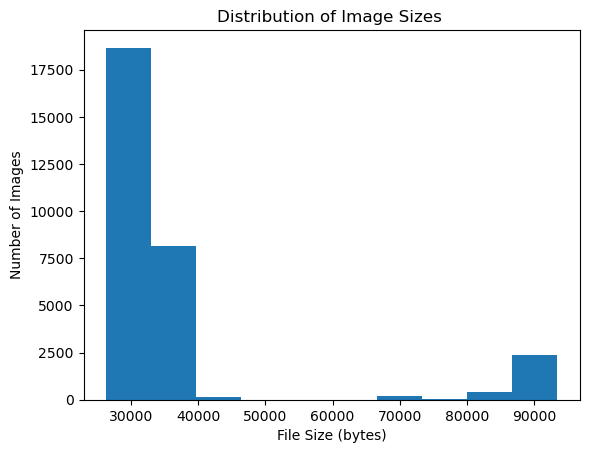

In [84]:
import matplotlib.pyplot as plt

# Plot a histogram of the image sizes
plt.hist(sizes)
plt.title("Distribution of Image Sizes ")
plt.xlabel("File Size (bytes)")
plt.ylabel("Number of Images")
plt.show()

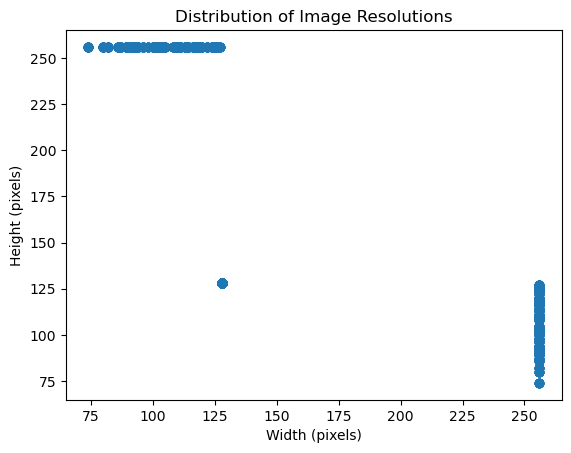

In [85]:
import matplotlib.pyplot as plt

# Plot a scatter plot of the image resolutions
plt.scatter(resolutions[:, 0], resolutions[:, 1])
plt.title("Distribution of Image Resolutions")
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
plt.show()

#### 4) Exploring Image Processing Techniques

##### · Canny Edge Detection

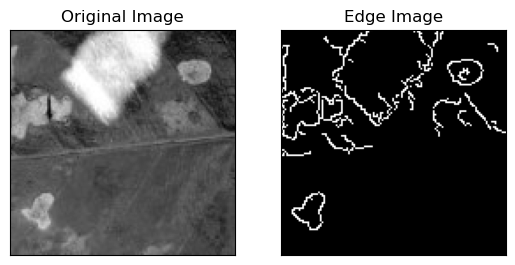

In [86]:
#Canny Edge Detection

import cv2 as cv
from matplotlib import pyplot as plt


#replace image path as needed 
img_path  = os.path.join(os.getcwd(), "JMuBEN/train/Miner/1 (4471).jpg")
img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
edges = cv.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

##### · Image Segmentation

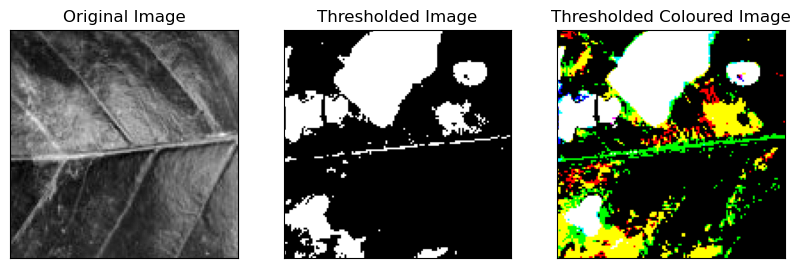

In [87]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_grayscale = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
image_normal = cv2.imread(img_path)

#threshold to segment the image
threshold_value = 130  
ret, thresholded_image = cv2.threshold(image_grayscale, threshold_value, 255, cv2.THRESH_BINARY)
ret, thresholded_image_coloured = cv2.threshold(image_normal, threshold_value, 255, cv2.THRESH_BINARY)

# Display 
plt.figure(figsize=(10, 5))
plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholded Image'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(thresholded_image_coloured, cmap='gray')
plt.title('Thresholded Coloured Image'), plt.xticks([]), plt.yticks([])


# Show the plots
plt.show()

#### 5) Model Training

In [88]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)


train_images = train_images.reshape(train_images.shape[0], -1)
train_labels = train_labels.reshape(train_images.shape[0], -1)

In [89]:
# Utilizing Gaussian Naive Bayes for classification
from sklearn.naive_bayes import GaussianNB
clf2 = GaussianNB()
train_labels = train_labels.ravel()
clf2.fit(train_images, train_labels)
predictions2 = clf2.predict(train_images)

#### 6) Evaluation Metrics

In [90]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(train_labels, predictions2)
print('Accuracy = ', accuracy)

Accuracy =  0.6695833333333333


In [91]:
from sklearn.metrics import confusion_matrix

# confusion matrix
confusion_matrix = confusion_matrix(train_labels, predictions2)
confusion_matrix

array([[9190, 2810],
       [5120, 6880]])

<Axes: >

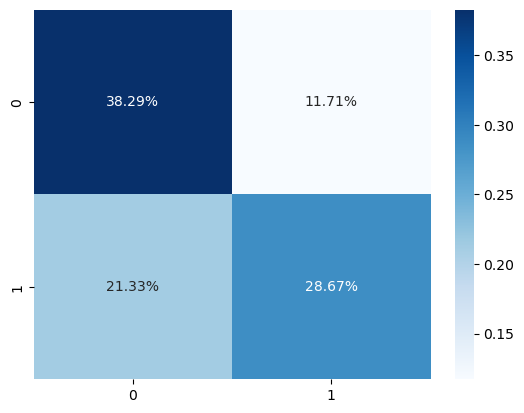

In [92]:
import seaborn as sns
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True,  fmt='.2%', cmap='Blues')

In [93]:
from sklearn.metrics import precision_score, recall_score
tp = confusion_matrix[0,0]
print("TP = ", tp)
fp = confusion_matrix[1,0]
print("FP = ", fp)
tn = confusion_matrix[1,1]
print("TN = ", tn)
fn = confusion_matrix[0,1]
print("FN = ", fn)
sensitivity = tp / (tp + fn)
print('Sensitivity = ', sensitivity)
specificity = tn/ (fp + tn)
print('Specificity = ', specificity)
precision = precision_score(train_labels, predictions2)
print('Precision = ', precision)
recall = recall_score(train_labels, predictions2)
print('Recall = ', recall)

TP =  9190
FP =  5120
TN =  6880
FN =  2810
Sensitivity =  0.7658333333333334
Specificity =  0.5733333333333334
Precision =  0.7100103199174407
Recall =  0.5733333333333334


Text(0.5, 1.0, 'Precision-Recall curve: AP=0.62')

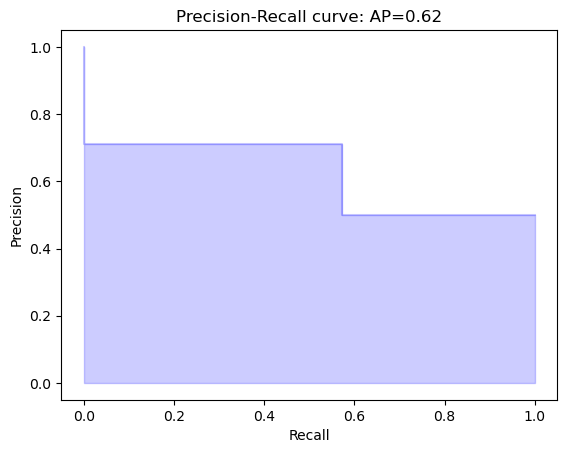

In [94]:
# Precision-Recall Curve

from sklearn.metrics import precision_recall_curve, average_precision_score


precision, recall, _ = precision_recall_curve(train_labels, predictions2)
average_precision = average_precision_score(train_labels, predictions2)
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

Area Under Curve =  0.6686722222222221


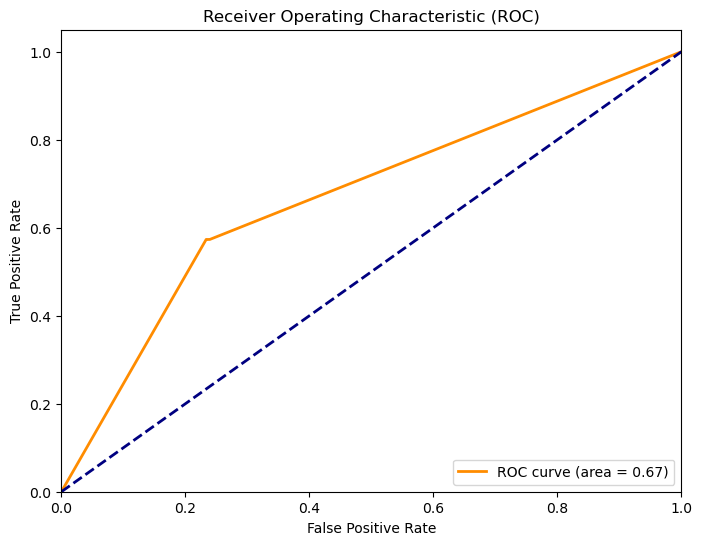

In [95]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate predicted probabilities for the positive class
probabilities = clf2.predict_proba(train_images)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(train_labels, probabilities)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)
print("Area Under Curve = ", roc_auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [96]:
from sklearn.model_selection import cross_val_score

scores2 = cross_val_score(clf2, train_images, train_labels, scoring="accuracy", cv=10)

def display_scores(scores):
    print("Scores:", scores2)
    print("Mean:", scores2.mean())
    print("Standard deviation:", scores2.std())

display_scores(scores2)

Scores: [0.66583333 0.6575     0.67875    0.67041667 0.68       0.67791667
 0.67       0.66458333 0.66958333 0.66125   ]
Mean: 0.6695833333333334
Standard deviation: 0.007192781875680028


In [97]:
scores2 = cross_val_score(clf2, train_images, train_labels, scoring="neg_mean_squared_error", cv=10)
clf2_rmse_scores = np.sqrt(-scores2)

display_scores(clf2_rmse_scores)

Scores: [-0.33416667 -0.3425     -0.32125    -0.32958333 -0.32       -0.32208333
 -0.33       -0.33541667 -0.33041667 -0.33875   ]
Mean: -0.3304166666666667
Standard deviation: 0.007192781875680032


In [98]:
from sklearn.metrics import classification_report

report = classification_report(train_labels, predictions2)

print(report)

              precision    recall  f1-score   support

           0       0.64      0.77      0.70     12000
           1       0.71      0.57      0.63     12000

    accuracy                           0.67     24000
   macro avg       0.68      0.67      0.67     24000
weighted avg       0.68      0.67      0.67     24000



In [99]:
tp = confusion_matrix.diagonal()
fn = np.sum(confusion_matrix, axis=1) - tp
fp = np.sum(confusion_matrix, axis=0) - tp
tn = np.sum(confusion_matrix) - (tp + fn + fp)

# TP Rate (Sensitivity or Recall)
tp_rate = tp / (tp + fn)

# FP Rate
fp_rate = fp / (fp + tn)

for class_label, tp, fp in zip(range(len(tp_rate)), tp_rate, fp_rate):
    print(f"Class {class_label}: \nTP Rate = {tp}, \nFP Rate = {fp}")

Class 0: 
TP Rate = 0.7658333333333334, 
FP Rate = 0.4266666666666667
Class 1: 
TP Rate = 0.5733333333333334, 
FP Rate = 0.23416666666666666


In [100]:
specificity = []
unique_labels = np.unique(train_labels)

for i in range(len(unique_labels)):
    true_negative = np.sum(confusion_matrix) - np.sum(confusion_matrix[i, :]) - np.sum(confusion_matrix[:, i]) + confusion_matrix[i, i]
    total_negative = np.sum(confusion_matrix) - np.sum(confusion_matrix[i, :])
    print(f'Label {unique_labels[i]} specificity: {true_negative / total_negative}')

Label 0 specificity: 0.5733333333333334
Label 1 specificity: 0.7658333333333334


In [101]:
from sklearn.metrics import recall_score

sensitivity = recall_score(train_labels, predictions2, average=None)
for i in range(len(unique_labels)):
    print(f'Label {unique_labels[i]} sensitivity: {sensitivity[i]}')

Label 0 sensitivity: 0.7658333333333334
Label 1 sensitivity: 0.5733333333333334


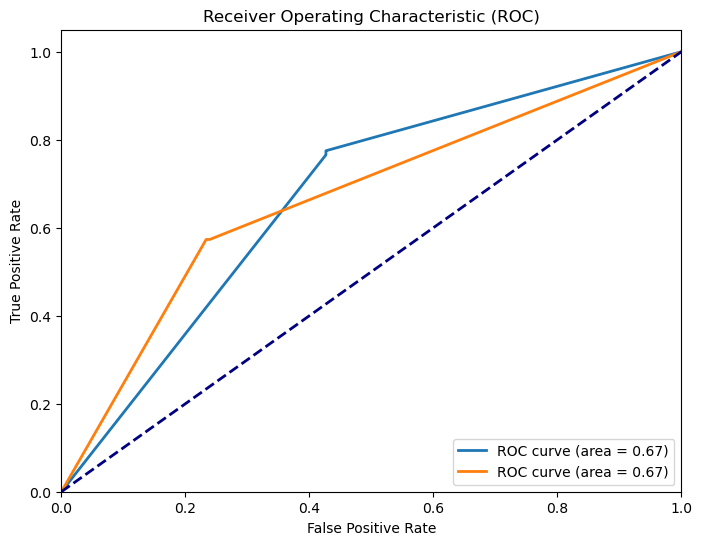

In [102]:
#plotting ROC curve for each class

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

probabilities = clf2.predict_proba(train_images)
roc_auc_scores = []
plt.figure(figsize=(8, 6))

for i in range(len(unique_labels)):
    fpr, tpr, _ = roc_curve((train_labels == unique_labels[i]).astype(int), probabilities[:, i])
    roc_auc = auc(fpr, tpr)
    roc_auc_scores.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [103]:
from sklearn.decomposition import PCA
  
# Reduce to 5 features
num_components = 5 
pca = PCA(num_components)
train_reduced5 = pca.fit_transform(train_images)
# Reduce to 10 features
num_components = 10 
pca = PCA(num_components)
train_reduced10 = pca.fit_transform(train_images)
# Reduce to 20 features
num_components = 20
pca = PCA(num_components)
train_reduced20 = pca.fit_transform(train_images)

train_labels = pd.DataFrame(train_labels)

result5 = pd.concat([train_labels, pd.DataFrame(train_reduced5,columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5'])], axis=1)
print(result5)
result10 = pd.concat([train_labels, pd.DataFrame(train_reduced10,columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10'])], axis=1)
print(result10)
result20 = pd.concat([train_labels, pd.DataFrame(train_reduced20,columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11', 'PCA12', 'PCA13', 'PCA14', 'PCA15', 'PCA16', 'PCA17', 'PCA18', 'PCA19', 'PCA20'])], axis=1)
print(result20)

       0       PCA1       PCA2       PCA3      PCA4      PCA5
0      1   8.330273  -1.193190  -3.476253  1.505856 -3.915334
1      1 -20.410301   0.253990  -2.626154 -0.078881  0.096664
2      1 -20.410301   0.253990  -2.626154 -0.078881  0.096664
3      1   5.701021   0.735386   3.000392  3.373587 -3.259743
4      1 -20.320585  -0.339649   3.133598  0.095117  1.252395
...   ..        ...        ...        ...       ...       ...
23995  0  22.561516  -4.825662   4.320716  5.900746  3.577444
23996  0   2.262596   0.098193   3.167895 -1.194778 -5.077782
23997  0  13.133603   3.101799  -2.845457 -1.088737  0.442860
23998  0   1.319800 -19.592755 -13.778806  4.430577  2.155044
23999  0  16.430551  -8.510260   4.941418 -1.574070 -5.679505

[24000 rows x 6 columns]
       0       PCA1       PCA2       PCA3      PCA4      PCA5      PCA6  \
0      1   8.330273  -1.193190  -3.476253  1.505857 -3.915344 -0.907168   
1      1 -20.410301   0.253990  -2.626154 -0.078881  0.096666 -0.023911   
2    

In [104]:
from sklearn.naive_bayes import GaussianNB

def evaluate_gaussian_nb(X_train, y_train):
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)
    y_pred = nb_model.predict(X_train)
    accuracy = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)
    roc_auc = roc_auc_score(y_train, y_pred)
    cross_val_scores = cross_val_score(nb_model, X_train, y_train, scoring="accuracy", cv=10)
    return accuracy, precision, recall, f1, roc_auc, cross_val_scores

In [105]:
accuracies = []

accuracy, precision, recall, f1, roc_auc, cross_val_scores = evaluate_gaussian_nb(result5[['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5']], result5[0])
accuracies.append(accuracy)
print("Accuracy = ", accuracy)
print("Precision = ", precision)
print("Recall = ", recall)
print("F1 = ", f1)
print("ROC AUC = ", roc_auc)
print("Cross Validation Score = ", cross_val_scores)

Accuracy =  0.854125
Precision =  0.8180049390107011
Recall =  0.9109166666666667
F1 =  0.8619642786736584
ROC AUC =  0.8541249999999999
Cross Validation Score =  [0.84666667 0.84666667 0.86083333 0.8625     0.8525     0.85125
 0.85041667 0.85541667 0.86333333 0.85166667]


In [106]:
accuracy, precision, recall, f1, roc_auc, cross_val_scores = evaluate_gaussian_nb(result10[['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10']], result10[0])
accuracies.append(accuracy)
print("Accuracy = ", accuracy)
print("Precision = ", precision)
print("Recall = ", recall)
print("F1 = ", f1)
print("ROC AUC = ", roc_auc)
print("Cross Validation Score = ", cross_val_scores)

Accuracy =  0.8556666666666667
Precision =  0.8474438293715402
Recall =  0.8675
F1 =  0.8573546367978916
ROC AUC =  0.8556666666666667
Cross Validation Score =  [0.8525     0.85083333 0.875      0.85541667 0.85416667 0.85291667
 0.85       0.85458333 0.86166667 0.85458333]


In [107]:
accuracy, precision, recall, f1, roc_auc, cross_val_scores = evaluate_gaussian_nb(result20[['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11', 'PCA12', 'PCA13', 'PCA14', 'PCA15', 'PCA16', 'PCA17', 'PCA18', 'PCA19', 'PCA20']], result20[0])
accuracies.append(accuracy)
print("Accuracy = ", accuracy)
print("Precision = ", precision)
print("Recall = ", recall)
print("F1 = ", f1)
print("ROC AUC = ", roc_auc)
print("Cross Validation Score = ", cross_val_scores)

Accuracy =  0.8928333333333334
Precision =  0.9100556715379262
Recall =  0.8718333333333333
F1 =  0.890534559073885
ROC AUC =  0.8928333333333334
Cross Validation Score =  [0.89791667 0.89708333 0.90166667 0.88583333 0.88791667 0.895
 0.89166667 0.88916667 0.89291667 0.88833333]


In [108]:
print('Mean Accuracy = ', np.mean(accuracies))

Mean Accuracy =  0.8675416666666668
